In [935]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sfa
import statsmodels.api as sma
from statsmodels.stats.diagnostic import linear_rainbow


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [936]:
mpg = sns.load_dataset('mpg')

In [937]:
# Objective: Train a LR model which could predict the milage of the car
# on the basis follwowing information
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [938]:
# LR model interpretations when IV is categorical (mpg~origin)

In [939]:
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [940]:
mpg.groupby(by=['origin'])['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [941]:
origin = pd.get_dummies(mpg['origin'],dtype=int,drop_first=True)

In [942]:
origin = sma.add_constant(origin)

In [943]:
origin

,const,japan,usa
0,1.0,0,1
1,1.0,0,1
2,1.0,0,1
3,1.0,0,1
4,1.0,0,1
...,...,...,...
393,1.0,0,1
394,1.0,0,0
395,1.0,0,1
396,1.0,0,1


In [944]:
model = sma.OLS(mpg['mpg'],origin).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.54
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.92e-35
Time:                        12:39:05   Log-Likelihood:                -1302.0
No. Observations:                 398   AIC:                             2610.
Df Residuals:                     395   BIC:                             2622.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.8914      0.765     36.461      0.000      26.388      29.395
japan          2.5592      1.051      2.436      0.015       0.494       4.625
usa           -7.8079      0.866     -9.018      0.000      -9.510      -6.106
==============================================================================
Omnibus:                       24.959   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.429
Skew:                           0.655   Prob(JB):                     6.71e-07
Kurtosis:                       3.021   Cond. No.                         5.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [945]:
# mpg = 27.8914 + (2.5592)*Japan - 7.8079*(usa) 

# Europe 0,0
# Japan 1,0
# USA   0,1

In [946]:
27.8914 + (2.5592)*(1) - 7.8079*(0)  # JAPAN

30.4506

In [947]:
27.8914 + (2.5592)*(0) - 7.8079*(1)  # USA

20.0835

In [948]:
27.8914 + (2.5592)*(0) - 7.8079*(0)  # Europe

27.8914

In [949]:
# So basically it predicts the avg of target in that category !!!!

In [950]:
# What if the category is not one hot or dummy encoded
mpg.groupby(by=['cylinders'])['mpg'].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

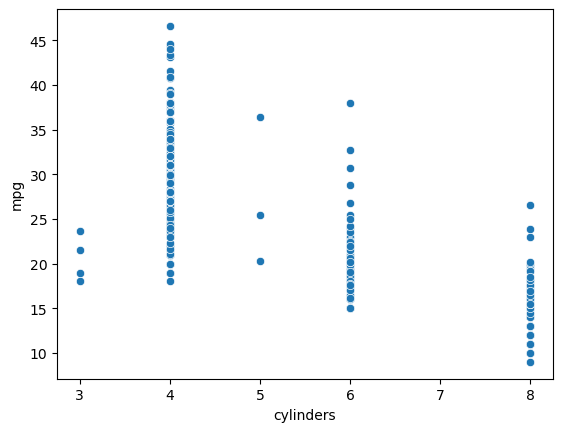

In [951]:
sns.scatterplot(mpg['cylinders'],mpg['mpg'])
plt.show()

In [952]:
cylinder = sma.add_constant(mpg['cylinders'])

In [953]:
model = sma.OLS(mpg['mpg'],cylinder).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     597.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.50e-81
Time:                        12:39:06   Log-Likelihood:                -1199.6
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9493      0.833     51.557      0.000      41.312      44.587
cylinders     -3.5629      0.146    -24.435      0.000      -3.850      -3.276
==============================================================================
Omnibus:                       39.142   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.841
Skew:                           0.704   Prob(JB):                     2.03e-12
Kurtosis:                       4.124   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [954]:
# mpg = 42.9493 - 3.5629*cylinders

In [955]:
print(42.9493 - 3.5629*3)
print(42.9493 - 3.5629*4)
print(42.9493 - 3.5629*5)
print(42.9493 - 3.5629*6)
print(42.9493 - 3.5629*8)

32.2606
28.6977
25.134800000000002
21.5719
14.446100000000001


In [956]:
mpg.groupby(by=['cylinders'])['mpg'].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

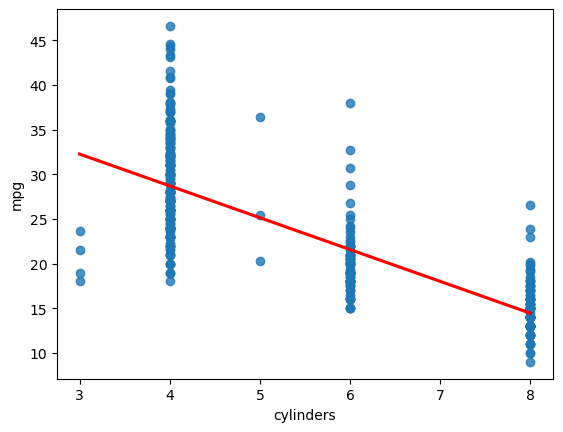

In [957]:
sns.regplot(mpg['cylinders'],mpg['mpg'],ci=0,line_kws={'color':'red'})

In [958]:
# here it regresses the model between the average of each category!!

### Lets make a LR model on This data

In [959]:
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


<AxesSubplot:>

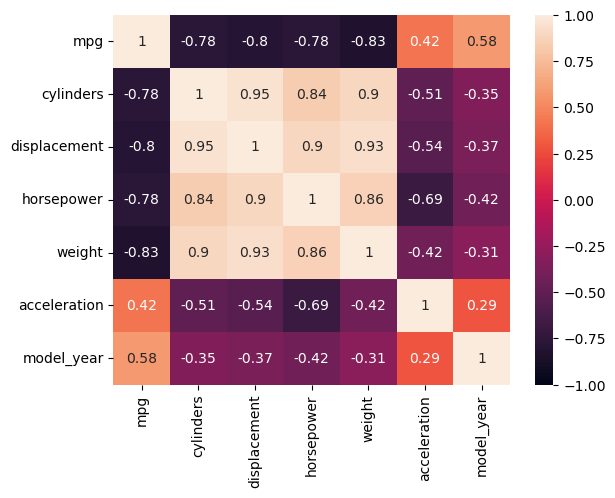

In [960]:
sns.heatmap(mpg.corr(),vmax=1,vmin=-1,annot=True)

In [961]:
mpg.describe(include=object).T

,count,unique,top,freq
origin,398,3,usa,249
name,398,305,ford pinto,6


In [962]:
## Missing values

mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [963]:
mpg['horsepower'].fillna(mpg['horsepower'].median(),inplace=True)

In [964]:
# Dummy encoding --> origin

In [965]:
mpg['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [966]:
mpg['brand'] = mpg['name'].str.split(expand=True).iloc[:,0]

In [967]:
top_10 = mpg['brand'].value_counts()[:10].index

In [968]:
top_10

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen'],
      dtype='object')

In [969]:
def brands(brand):
    if brand not in top_10:
        return 'others'
    else:
        return brand

In [970]:
mpg['brand'] = mpg['brand'].apply(brands)

In [971]:
map_dict = mpg['brand'].value_counts().to_dict()

In [972]:
mpg['brand'] = mpg['brand'].map(map_dict)

In [973]:
del mpg['name']

In [974]:
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [975]:
mpg = pd.get_dummies(mpg,dtype=int)
del mpg['origin_usa']

In [976]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,brand,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,43,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,17,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,31,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,28,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,51,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,51,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,121,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,28,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,51,0,0


In [977]:
# To remove multicolinearity lets
mpg['Engine para'] = mpg['horsepower']+mpg['weight']+mpg['cylinders']+mpg['displacement']+mpg['acceleration']
mpg.drop(columns=['horsepower','weight','cylinders','displacement','acceleration'],inplace=True)

## Build a base model

In [978]:
x = mpg.drop(columns=['mpg'])
y = mpg['mpg']

In [979]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=3)

In [980]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(318, 5) (318,) (80, 5) (80,)


In [981]:
# Assumption1: Target is number: met
# Assumption2: Multicollinearity: not met

In [982]:
vif_list = []

for i in range(x_train.shape[1]):
    vif_list.append(variance_inflation_factor(x_train.values,i))

pd.DataFrame({'Feature Names':x_train.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Names,VIF
0,model_year,22.600796
4,Engine para,17.395331
1,brand,3.812963
2,origin_europe,2.130789
3,origin_japan,1.990414


<AxesSubplot:>

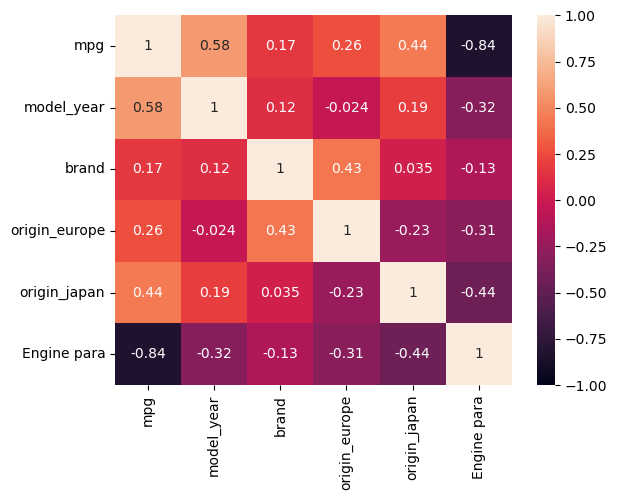

In [983]:
sns.heatmap(mpg.corr(),vmax=1,vmin=-1,annot=True)

In [984]:
# fit a model
x_train_c = sma.add_constant(x_train)
x_test_c = sma.add_constant(x_test)

base_model = sma.OLS(y_train,x_train_c).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     277.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          1.88e-112
Time:                        12:39:10   Log-Likelihood:                -834.36
No. Observations:                 318   AIC:                             1681.
Df Residuals:                     312   BIC:                             1703.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -16.3297      4.683     -3.487      0.001     -25.544      -7.116
model_year        0.7291      0.056     12.938      0.000       0.618       0.840
brand            -0.0002      0.005     -0.032      0.974      -0.010       0.010
origin_europe     1.8539      0.656      2.827      0.005       0.564       3.144
origin_japan      2.5087      0.628      3.997      0.000       1.274       3.744
Engine para      -0.0050      0.000    -18.804      0.000      -0.005      -0.004
==============================================================================
Omnibus:                       38.395   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.127
Skew:                           0.665   Prob(JB):                     8.01e-17
Kurtosis:                       4.956   Cond. No.                     8.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [985]:
# Assumption- Linearity: met

# Ho: Varaibles are linear
# Ha: Variables are not linear
p_val = linear_rainbow(base_model)[1]

if p_val <0.05:
    print('Reject Ho:')
else:
    print('Fail to reject Ho:')

Fail to reject Ho:


In [986]:
# Assumption Autocorrelation: met

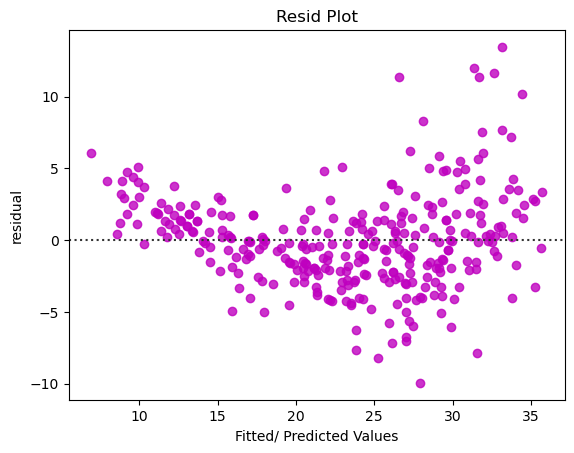

In [987]:
# Assumption Homoskedasticty: not met

# Assumption of Homoskedasticity
sns.residplot(x=base_model.fittedvalues,y=base_model.resid,color='m')
plt.xlabel('Fitted/ Predicted Values')
plt.ylabel('residual')
plt.title('Resid Plot')
plt.show()

In [988]:
# Breusch pagan test

# Ho: The variance is same: Homoskedastic
# Ha: The variance is not same: Heteresckedastic

p_value = sma.stats.diagnostic.het_breuschpagan(resid=base_model.resid,exog_het=base_model.model.exog)[1]

if p_value> 0.05:
    print('Fail to reject Ho:')
else:
    print('reject Ho:')

reject Ho:


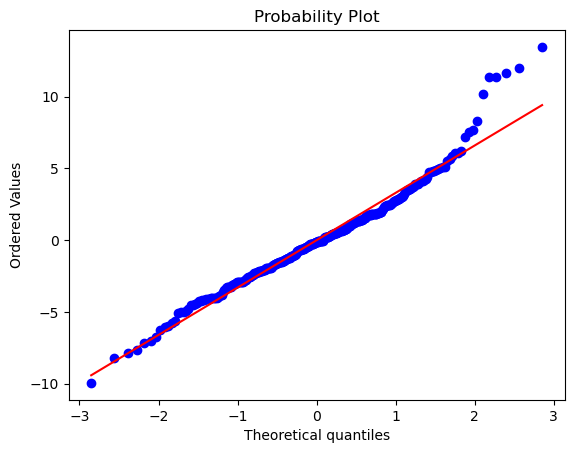

In [989]:
# Assumption Normality: not met
import scipy.stats as stats
stats.probplot(base_model.resid,plot=plt)
plt.show()

In [990]:
# Shapiro Wilk test (N < 5000)

# Ho: The data is normal
# ha: The data is not normal

p_val = stats.shapiro(base_model.resid)[1]

if p_val> 0.05:
    print('Fail to reject Ho:')
else:
    print('reject Ho:')

reject Ho:


In [991]:
## Summary
# Assumption 1: number target: met
# Assumption 2: multicilinearity: not met (category)
# Assumption 3: Linearity: met
# Assumption 4: Autocorrelation: met
# Assumption 5: Homoscedasticity: not met
# Assumption 6: Normal residuals: not met

In [992]:
# As per p values these is signicance order
base_model.pvalues.sort_values()

Engine para      2.878881e-53
model_year       6.019365e-31
origin_japan     8.008617e-05
const            5.584983e-04
origin_europe    5.003131e-03
brand            9.742417e-01
dtype: float64

## Validation

In [993]:
def validation(test,pred,data):
    r2 = r2_score(test,pred)
    print('R Squared:',r2)
    n = data.shape[0]
    k = data.shape[1]
    r2_adj = 1 - ((1-r2)*(n-1)/(n-k-1))
    print('Adj R Square:',r2_adj)
    print('MSE:',mean_squared_error(test,pred))
    print('RMSE:',np.sqrt(mean_squared_error(test,pred)))
    print('MAE:',mean_absolute_error(test,pred))
    print('MAPE:',mean_absolute_percentage_error(test,pred))

In [994]:
# Train dataset
pred_train = base_model.predict(x_train_c)

validation(y_train,pred_train,x_train_c)

R Squared: 0.8162102340487232
Adj R Square: 0.8126644507827822
MSE: 11.130572049853573
RMSE: 3.3362511970553976
MAE: 2.4793796835143254
MAPE: 0.1122706524296549


In [995]:
# test dataset
pred_test = base_model.predict(x_test_c)

validation(y_test,pred_test,x_test_c)

R Squared: 0.8141474499264882
Adj R Square: 0.7988718978656517
MSE: 11.488632195883257
RMSE: 3.3894884858755985
MAE: 2.5644480612875924
MAPE: 0.11547652921581533


In [996]:
# it seems that the model is good fit or very lil variance
